<a href="https://colab.research.google.com/github/Abdul-AI-creator/Abdul-AI-creator/blob/main/Joint_feature_selection_with_multi_task_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Generate Data**

In [11]:
import numpy as np

rng = np.random.RandomState(42)
# Generate some 2D coefficients with sine wave with random frequency and phase

n_samples ,n_features , n_tasks = 100 , 30 ,40
n_relevant_features = 5
coef = np.zeros((n_tasks , n_features))
times = np.linspace( 0,2 * np.pi,n_tasks)
for k in range(n_relevant_features):
  coef[:, k]=np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X ,coef.T) + rng.randn(n_samples , n_tasks)


**FIT MODEL**

In [13]:
from sklearn.linear_model import Lasso , MultiTaskLasso
coef_lasso = np.array([Lasso(alpha=0.5).fit(X,y).coef_ for y in Y.T])
coef_multi_task_lasso = MultiTaskLasso(alpha=1.0).fit(X, Y).coef_
coef_multi_task_lasso

array([[-0.36689566, -0.64870018, -0.48725649, ...,  0.        ,
         0.        ,  0.        ],
       [-0.28578986, -0.76248975, -0.42867474, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12359781, -0.54994442, -0.31829233, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.51857103,  0.78488141, -0.15328409, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.47027982,  0.84901126, -0.62666168, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.31773425,  0.54886048, -0.5543684 , ...,  0.        ,
         0.        ,  0.        ]])

# **Plot support and time series**

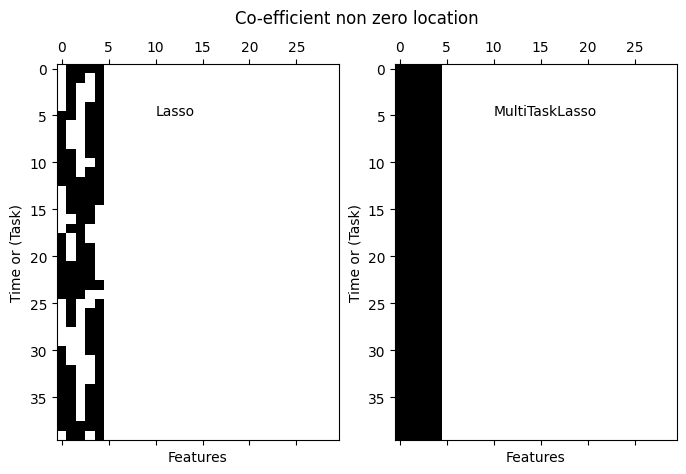

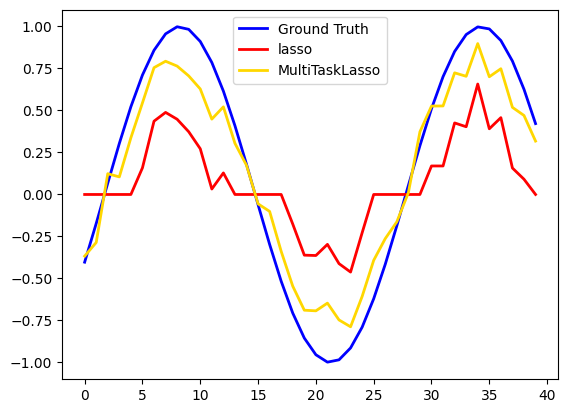

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(8, 5))
plt.subplot(1, 2, 1)
plt.spy(coef_lasso)
plt.xlabel("Features")
plt.ylabel("Time or (Task)")
plt.text(10, 5,"Lasso")

plt.subplot(1 ,2 ,2)
plt.spy(coef_multi_task_lasso)
plt.xlabel("Features")
plt.ylabel("Time or (Task)")
plt.text(10 ,5 ,"MultiTaskLasso")
fig.suptitle("Co-efficient non zero location")

feature_to_plot =0
plt.figure()

lw= 2
plt.plot(coef[:, feature_to_plot], color= "blue",linewidth=lw, label="Ground Truth")
plt.plot(coef_lasso[:, feature_to_plot],color = "red",linewidth=lw , label="lasso")
plt.plot(coef_multi_task_lasso[:, feature_to_plot],color ="gold",linewidth=lw , label="MultiTaskLasso")
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])
plt.show()
